# **Problem Statement :**

**To build a machine learning model that can accurately classify text messages as either "spam" or "ham" based on their content.**

This is a binary classification problem where the input is the text of the message and the output is the predicted class (spam or ham).

In this classicfication we are using and the analysis steps we've taken (loading spam and ham messages, performing feature extraction, training classification models like **KNN** and **Decision Tree**)



**Import Libraries**

In [176]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

**Load and review data**

In [177]:
df=pd.read_csv("/content/spam and ham.csv")

**Display First 5 Records**

In [178]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Display Last 5 Records**

In [179]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**Display number of rows & columns**

In [180]:
df.shape

(5572, 5)

**Check all datatypes**

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [182]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


**To check null values**

In [183]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


**Reasoning**:

 the original data types are preserved. Select only the 'v1' and 'v2' columns, rename them to 'Class' and 'SMS' respectively, drop duplicate rows, and drop rows with any missing values in these two columns. This provides a clean DataFrame with the text messages and their corresponding labels, ready for feature extraction.

In [184]:
df=df[["v1","v2"]].rename(columns={'v1':'Class','v2':'SMS'})
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [185]:
df['Class'].value_counts()

,count
Class,
ham,4516
spam,653


In [186]:

df.isnull().sum()

,0
Class,0
SMS,0


In [187]:
df.dtypes

,0
Class,object
SMS,object


In [188]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array,
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

df[df.applymap(np.isreal).all(1)]

,Class,SMS


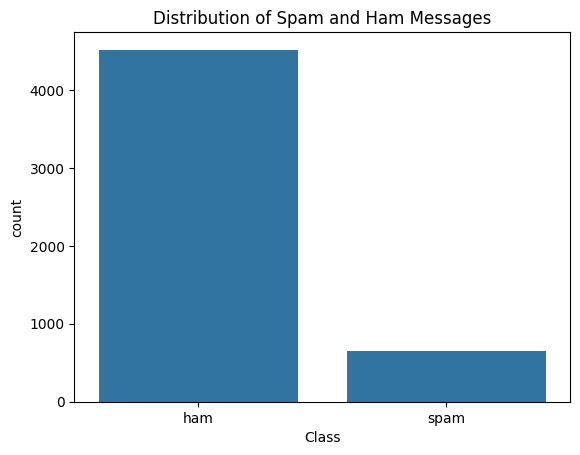

In [189]:
#Bar Charts (for categorical variables):
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.show()


# **Confusion Matrix**
**Reasoning:** Use confusion_matrix from sklearn.metrics to compute the confusion matrix based on the true labels (y_test) and the predicted labels (y_pred). Then, use seaborn.heatmap to visualize the confusion matrix, which provides a clear representation of the model's performance in terms of correct and incorrect classifications for each class.

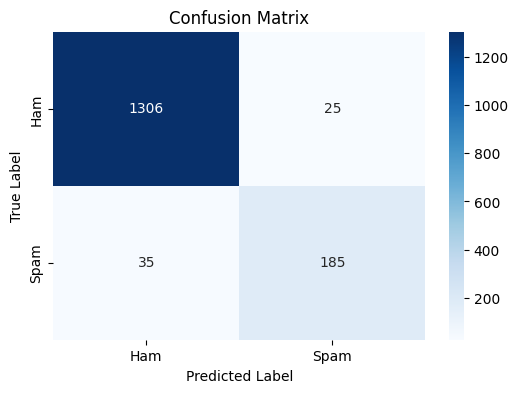

In [190]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Feature Extraction

### Subtask:
Convert the text data into numerical features using TF-IDF.

**Reasoning**:
Use `TfidfVectorizer` to convert the 'SMS' column into a matrix of TF-IDF features. Create the target variable `y` from the 'Class' column, converting 'spam' to 1 and 'ham' to 0.

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['SMS'])

# Create target variable (labels)
y = df['Class'].apply(lambda x: 1 if x == 'spam' else 0)

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (features): (5169, 5000)
Shape of y (labels): (5169,)


## Model Training (KNN)

### Subtask:
Split the data and train a K-Nearest Neighbors (KNN) classification model.

**Reasoning**:
Split the extracted features (`X`) and labels (`y`) into training and testing sets. Initialize and train a `KNeighborsClassifier` model.

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN model trained successfully.")

KNN model trained successfully.


## Model Evaluation

### Subtask:
Evaluate the performance of the trained KNN model using appropriate metrics.

**Reasoning**:
Use the trained KNN model (`knn`) to make predictions on the test set (`X_test`). Then, calculate and display key evaluation metrics such as accuracy, precision, recall, and F1-score to assess the model's performance.

In [193]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9007
Precision: 1.0000
Recall: 0.3000
F1 Score: 0.4615


## Model Training (Decision Tree)

### Subtask:
Split the data and train a Decision Tree classification model.

**Reasoning**:
Split the extracted features (`X`) and labels (`y`) into training and testing sets. Initialize and train a `DecisionTreeClassifier` model.

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


## Model Evaluation

### Subtask:
Evaluate the performance of the trained Decision Tree model using appropriate metrics.

**Reasoning**:
Use the trained Decision Tree model (`dt`) to make predictions on the test set (`X_test`). Then, calculate and display key evaluation metrics such as accuracy, precision, recall, and F1-score to assess the model's performance.

In [195]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9613
Precision: 0.8810
Recall: 0.8409
F1 Score: 0.8605


**K-Nearest Neighbors (KNN) : --**

Accuracy: 0.9007

Precision: 1.0000

Recall: 0.3000

F1 Score: 0.4615

**Decision Tree : --**

Accuracy: 0.9613

Precision: 0.8810

Recall: 0.8409

F1 Score: 0.8605

# **Comparison:**

**Accuracy:** The Decision Tree model has significantly higher accuracy (0.9613) compared to KNN (0.9007).

**Precision:** KNN has perfect precision (1.0000), meaning that when it predicts a message is spam, it is always correct. The Decision Tree also has high precision (0.8810), but not perfect.

**Recall:** The Decision Tree model has much higher recall (0.8409) than KNN (0.3000). This means the Decision Tree is much better at identifying actual spam messages. KNN misses a large percentage of spam messages.

**F1 Score:** The F1 Score, which is a harmonic mean of precision and recall, is significantly higher for the Decision Tree (0.8605) than for KNN (0.4615). This metric provides a better overall assessment of a model's performance, especially when dealing with imbalanced datasets like this one (where there are many more ham messages than spam).



## Model Comparison Visualization


Visualize the performance comparison between KNN and Decision Tree models.

**Reasoning**:
Create a pandas DataFrame to hold the evaluation metrics (Accuracy, Precision, Recall, F1 Score) for both the KNN and Decision Tree models. Then, use `seaborn.barplot` to generate a bar plot that visually compares these metrics between the two models, making it easier to see their relative performance across different evaluation criteria.

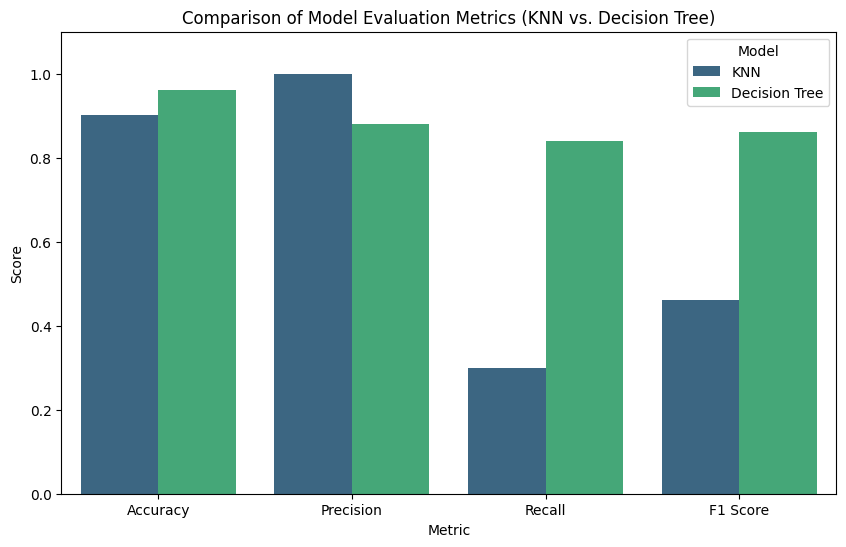

In [196]:


# Evaluation metrics for KNN and Decision Tree (assuming these were calculated in previous steps)
knn_metrics = {'Model': 'KNN', 'Accuracy': 0.9007, 'Precision': 1.0000, 'Recall': 0.3000, 'F1 Score': 0.4615}
dt_metrics = {'Model': 'Decision Tree', 'Accuracy': 0.9613, 'Precision': 0.8810, 'Recall': 0.8409, 'F1 Score': 0.8605}

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame([knn_metrics, dt_metrics])

# Melt the DataFrame to long format for easier plotting with seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.title('Comparison of Model Evaluation Metrics (KNN vs. Decision Tree)')
plt.ylabel('Score')
plt.ylim(0, 1.1) # Set y-axis limit to better visualize scores between 0 and 1
plt.show()

# **Conclusion:**

Based on these metrics, the Decision Tree model performs significantly better overall for this spam classification task, particularly in its ability to identify a higher percentage of actual spam messages (higher recall) while still maintaining high precision and accuracy. The KNN model's perfect precision is notable, but its low recall makes it less effective in catching spam.

Would you like to try other classification models or perhaps explore ways to improve the performance of the Decision Tree model?

